In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/home/clementpoiret/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/clementpoiret/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/clementpoiret/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)

In [3]:
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

Text(0,0.5,'y')

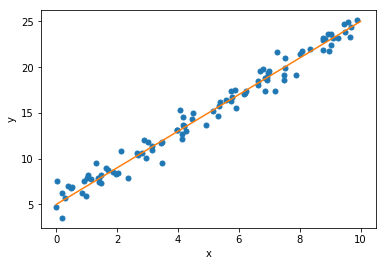

In [4]:
plt.figure()
plt.plot(x, y, "o", ms=5)
xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel("x")
plt.ylabel("y")

In [5]:
def compute_rss(y_estimate, y): 
  return sum(np.power(y-y_estimate, 2)) 
def estimate_y(x, b_0, b_1): 
  return b_0 + b_1 * x 
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
rss

81.540007425512

In [6]:
rss = []
slopes = np.arange(-10, 15, 0.01)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x)**2))

In [7]:
ind_min = np.argmin(rss)

In [8]:
print("Estimate for the slope: ", slopes[ind_min])

Estimate for the slope:  1.9999999999997442


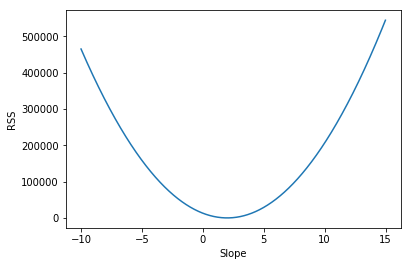

In [9]:
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS");

In [10]:
mod = sm.OLS(y, x)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2974.
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           1.14e-75
Time:                        17:06:58   Log-Likelihood:                -246.89
No. Observations:                 100   AIC:                             495.8
Df Residuals:                      99   BIC:                             498.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7569      0.051     54.538      0.0

In [11]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           7.47e-82
Time:                        17:06:58   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

In [12]:
n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)

In [13]:
x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc=0, scale=1, size=n)

In [14]:
X = np.stack([x_1, x_2], axis=1)

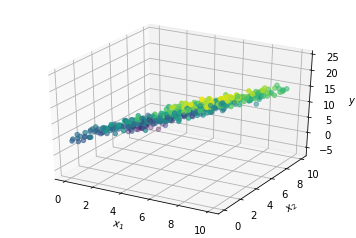

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$");

In [16]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lm.intercept_ - beta_0

0.15407776377725035

In [18]:
print(lm.coef_[0] - beta_1)
print(lm.coef_[1] - beta_2)

-6.210101085968311e-05
-0.020264486993335495


In [19]:
X_0 = np.array([2, 4])

In [20]:
lm.predict(X_0.reshape(1, -1))

array([5.07289561])

In [21]:
lm.score(X, y)

0.9798997316600129

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

/home/clementpoiret/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
lm = LinearRegression(fit_intercept=True)

In [24]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
lm.score(X_test, y_test)

0.9794930834681773